# Decision trees for classification

In this notebook we discuss the decision tree algorithm for classification problems with two data sets. A decision tree allows to visually and explicitly represent decisions and decision making via a tree-like model of decisions. In this way, it may be applied classify data. For further information on this matter, we refer to https://en.wikipedia.org/wiki/Decision_tree, https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb and https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052.

In [2]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

## Case 1: Failure/success classification

In the following we apply the decision tree classifier to a data set with failure/success information. 

In [3]:
#define data frame
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescaling of training and test data not needed for decision trees

In [5]:
#?DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9466666666666667


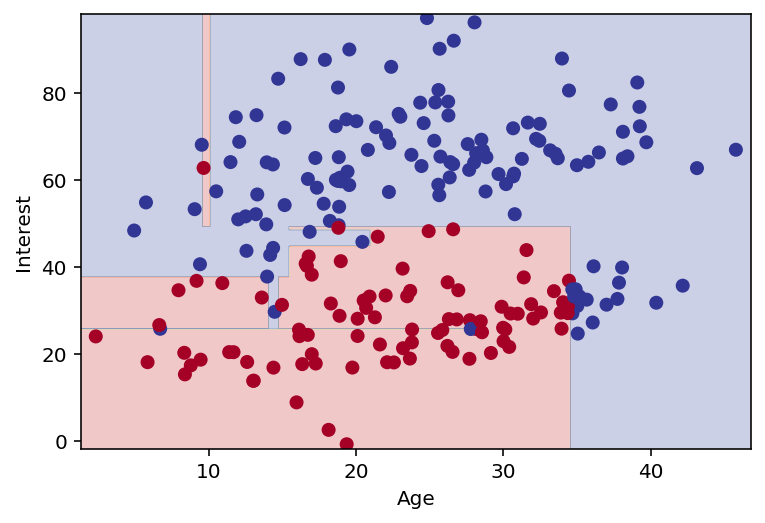

In [7]:
#plotting for the training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

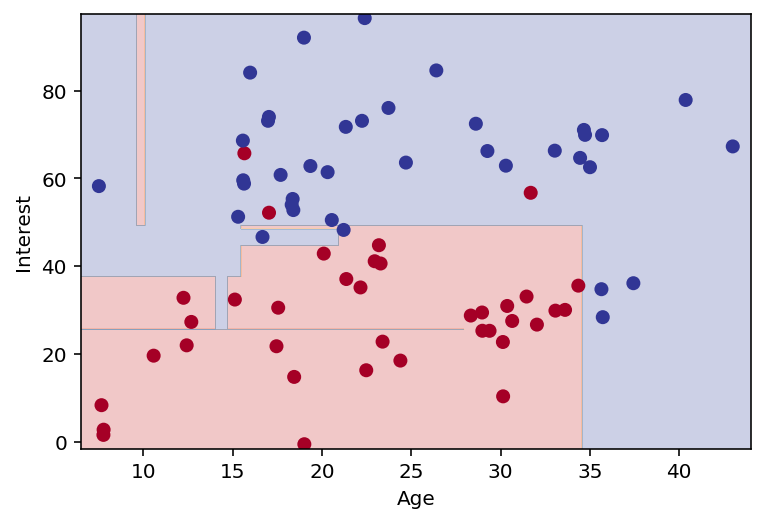

In [8]:
#plotting for the test data
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

Comment: Characteristic is the splitting of regions by means of shar horizontal and vertical lines. We observe that so far the decision tree algorithm has problems to classify certain regions (e.g. top left part). We would like to improve this.

We would like to visualize the decision tree:

In [16]:
from sklearn.tree import export_graphviz

tree = export_graphviz(model, None, feature_names = ["age","interest"], class_names = ["failure", "success"], rounded = True, filled = True) #want to operate on the given model and not save it as a txt file
#options rounded = True, filled = True improve graphical output down below
print(tree)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="interest <= 49.229\nentropy = 0.976\nsamples = 222\nvalue = [91, 131]\nclass = success", fillcolor="#399de54e"] ;
1 [label="age <= 34.563\nentropy = 0.791\nsamples = 118\nvalue = [90, 28]\nclass = failure", fillcolor="#e58139b0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="interest <= 37.621\nentropy = 0.497\nsamples = 101\nvalue = [90, 11]\nclass = failure", fillcolor="#e58139e0"] ;
1 -> 2 ;
3 [label="interest <= 25.61\nentropy = 0.226\nsamples = 82\nvalue = [79, 3]\nclass = failure", fillcolor="#e58139f5"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = failure", fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label="interest <= 25.719\nentropy = 0.371\nsamples = 42\nvalue = [39, 3]\nclass = failure", fillcolor="#e58139eb"] ;
3 -> 5 ;
6 [label="age <= 27.965\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclas

We have to further process this information to increase illustration qualities.

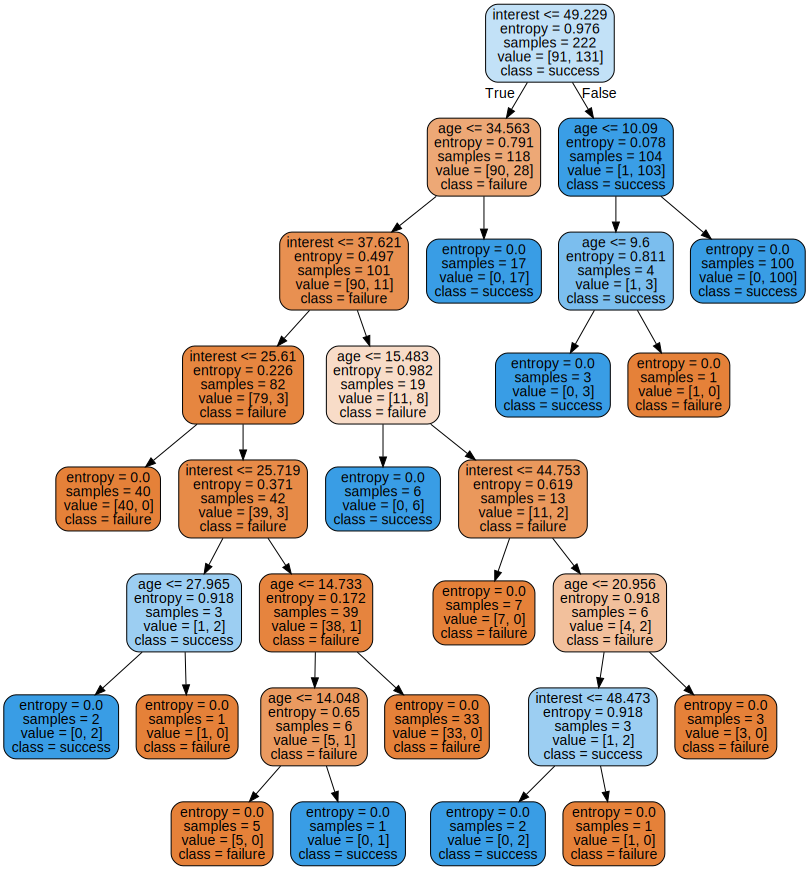

In [17]:
import graphviz

graphviz.Source(tree)

Comment: This decision tree visualizes the above-given plots with decision boundaries. The boxes represent decision regions for a certain number of samples. The numbers in brackets added equal the number of samples. Each of these number represents the number of failures and successes, respectively, as per current box. The decision taking process is pursued until the entropy vanishes (= we reach the final leaf in a branch), i.e. no further information can be retrieved there.

In the following we would like to amend the fitting to smoothen out the effect of exceptional data points in (mostly) complementary decision regions.

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 3) #to restrict the depth of the tree, the minimal number of samples per leaf
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9333333333333333


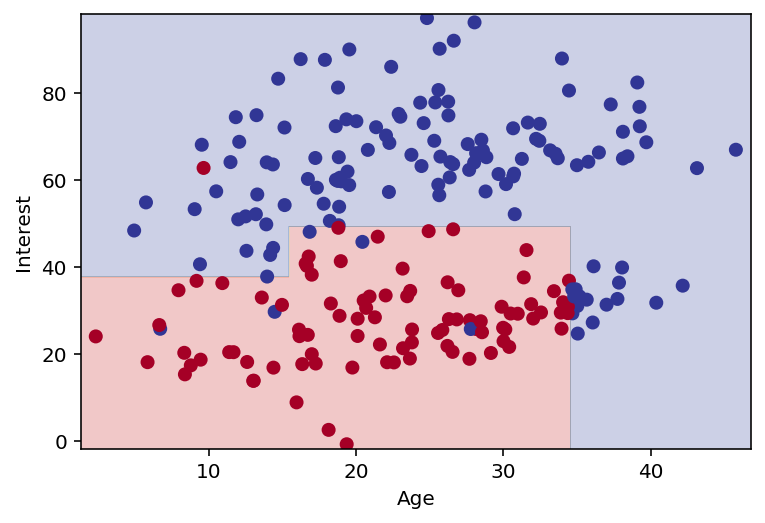

In [20]:
#plotting for the training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

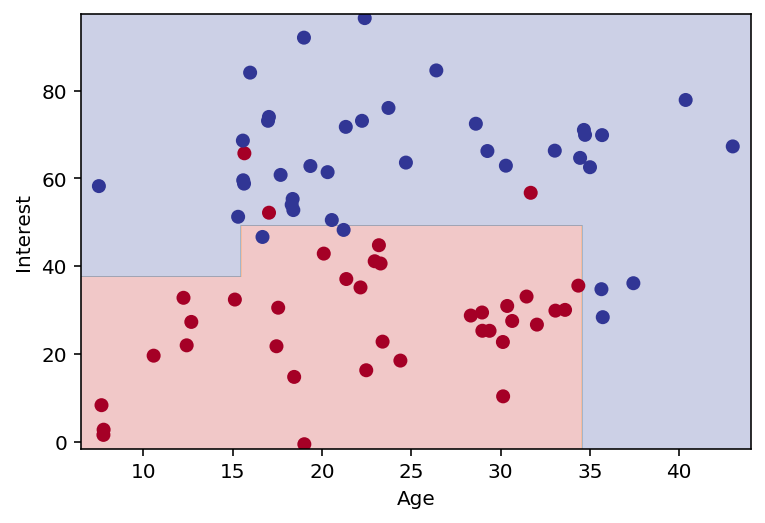

In [21]:
#plotting for the test data
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

The restrictions implemented above have the nice effect that the model suffers from less overfitting to the training data. So it is meaningful also from that perspective to implement these.

For the tree itself, we find:

In [23]:
tree = export_graphviz(model, None, feature_names = ["age","interest"], class_names = ["failure", "success"], rounded = True, filled = True) #want to operate on the given model and not save it as a txt file
#options rounded = True, filled = True improve graphical output down below
#print(tree)

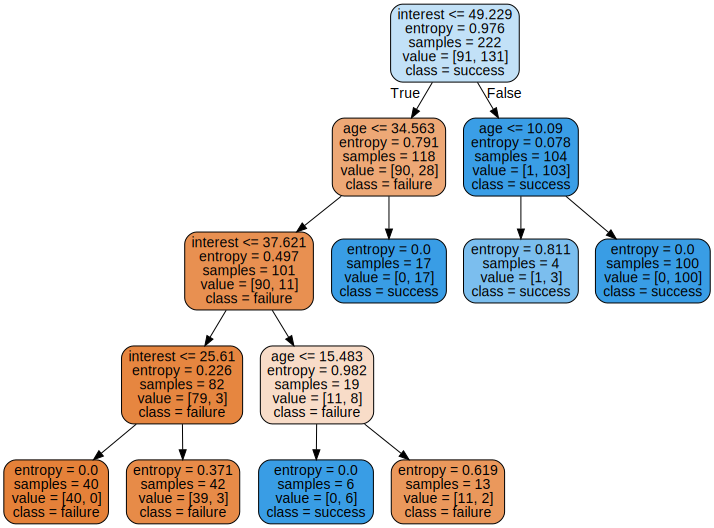

In [24]:
graphviz.Source(tree)

We can retrieve probabilities for failure vs. success from the tree for test data. 

In [28]:
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

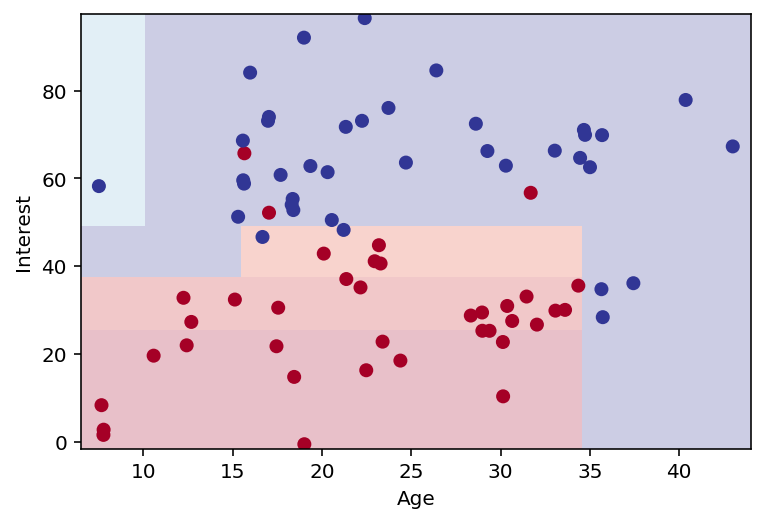

In [29]:
#plotting decision regions for the test data with "transitions"
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

Comment: We see that there are no smooth transition regions for decision trees which is due to the specifics of theis classification algorithm.

To extract the tree and save it we have to do the following:

In [31]:
src = graphviz.Source(tree, format = "png")
src.render("file")

'file.pdf'

## Case 2: Eadibility of mushrooms

In the following we apply the decision tree algorithm to classify whether a mushroom is edible or not. Given the amount of columns of this particular data set the application of this algorithm is advantageous as compared to logistic regression classifiers.

In [51]:
#define data frame
df = pd.read_csv("mushrooms.csv")

#since the data set has columns with categorical variables, one-hot-encoding can be implemented via:
df = pd.get_dummies(df)

#we need to drop either class_e or class_p (1+0 = 1 anyways)
df = df.drop("class_e", axis = 1)

df.head()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [52]:
df.columns.values

array(['class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-a

In [57]:
#define variables
X = df.drop("class_p", axis = 1).values #we want all columns apart from the labeling one

Y = df['class_p'].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescaling of training and test data not needed for decision trees

In [58]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

1.0


In [61]:
tree = export_graphviz(model, None, feature_names = df.drop("class_p", axis = 1).columns.values, class_names = ["edible", "poisonous"], rounded = True, filled = True) #want to operate on the given model and not save it as a txt file
#for feature names: we want all columns apart from the labeling one

#options rounded = True, filled = True improve graphical output down below
print(tree)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="odor_n <= 0.5\nentropy = 0.999\nsamples = 6093\nvalue = [3147, 2946]\nclass = edible", fillcolor="#e5813910"] ;
1 [label="bruises_t <= 0.5\nentropy = 0.654\nsamples = 3431\nvalue = [578, 2853]\nclass = poisonous", fillcolor="#399de5cb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 2441\nvalue = [0, 2441]\nclass = poisonous", fillcolor="#399de5ff"] ;
1 -> 2 ;
3 [label="stalk-root_c <= 0.5\nentropy = 0.98\nsamples = 990\nvalue = [578, 412]\nclass = edible", fillcolor="#e5813949"] ;
1 -> 3 ;
4 [label="stalk-root_r <= 0.5\nentropy = 0.925\nsamples = 624\nvalue = [212, 412]\nclass = poisonous", fillcolor="#399de57c"] ;
3 -> 4 ;
5 [label="habitat_d <= 0.5\nentropy = 0.584\nsamples = 479\nvalue = [67, 412]\nclass = poisonous", fillcolor="#399de5d6"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 412\nvalue = [0

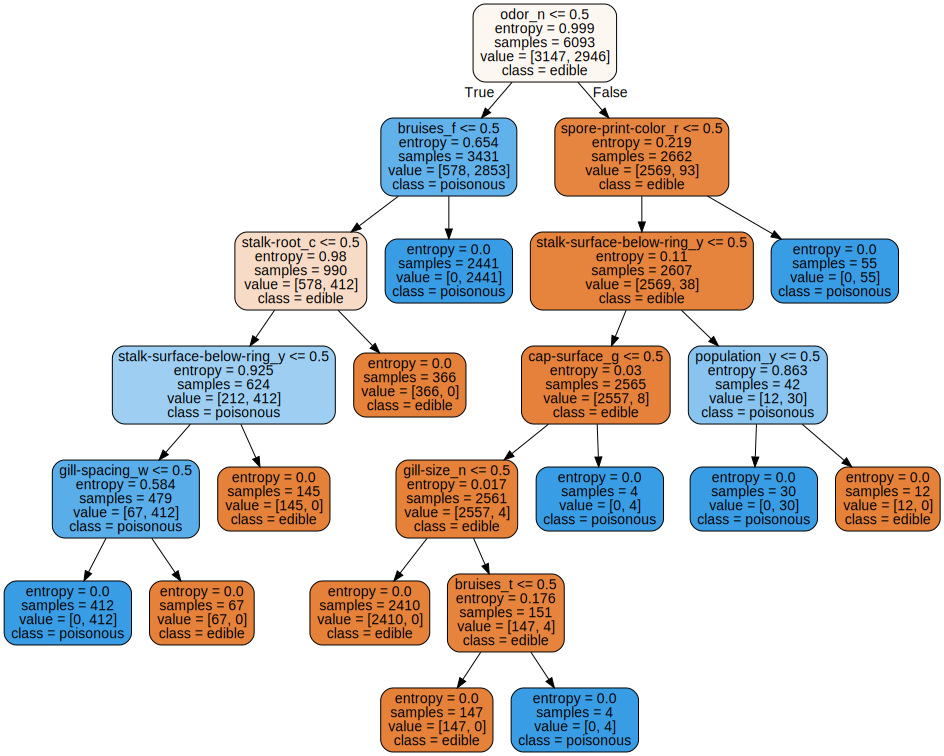

In [56]:
graphviz.Source(tree)